<a href="https://colab.research.google.com/github/abhi-11nav/Car-price-prediction/blob/main/Care_resale_value_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Importing libraries 

import pandas as pd
import numpy as np


# Importing visualization libraries 

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

In [12]:
# Path of raw data uploaded on github 

dataset_link = "https://raw.githubusercontent.com/abhi-11nav/Car-price-prediction/main/CAR%20DETAILS%20FROM%20CAR%20DEKHO.csv.xls"

In [13]:
# Data stored in a variable

dataset = pd.read_csv(dataset_link)

In [14]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [16]:
# Checking for null values in the dataset

dataset.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
dtype: bool

There are no null values. We are good to proceed with the dataset

In [21]:
# Let us check for distinct values in the name feature since it appears to be filled with distinct values

(len(dataset.name.value_counts())/dataset.shape[0])*100

34.35483870967742

There are approximately 35% unique values present in the dataset. So, let us eliminate the feature

In [23]:
# Dropping the "name" feature 

dataset.drop('name',axis=1,inplace=True)

In [24]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


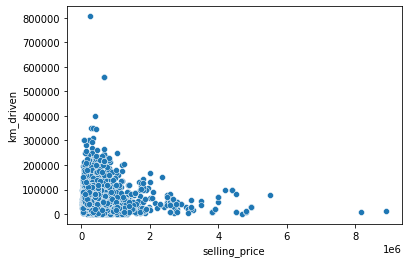

In [27]:
# Checking the realtion between km_driven and sellin_price

sns.scatterplot(dataset['selling_price'], dataset['km_driven'])

Well, it seems to have a linear relation. 

# DO PEARSON R FOR CORREALTION

In [28]:
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [29]:
# Seperating the features and labels

X = dataset.drop('selling_price',axis=1)

y = dataset['selling_price']

In [34]:
# Categorical columns 

for cols in X.columns:
  if type(dataset[cols][0]) == str:
    print(dataset[cols].value_counts(),"\n\n")

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64 


Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64 


Manual       3892
Automatic     448
Name: transmission, dtype: int64 


First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64 


